In [1]:
from simulator import Sim
from base_strategy import BaseStrategy

from stoikov_strategy import StoikovStrategy, FutureStrategy

from get_info import get_pnl
from load_data import load_md_from_file


import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

PATH_TO_FILE = '../md/btcusdt:Binance:LinearPerpetual/'
T = pd.Timedelta(60, 'm').delta

In [2]:
def get_vol(df):
    return np.sum( np.abs( np.diff(df.BTC.values) ) )

In [3]:
md = load_md_from_file(path=PATH_TO_FILE, T=T)

In [4]:
latency = pd.Timedelta(10, 'ms').delta
md_latency = pd.Timedelta(10, 'ms').delta

#delay between orders
delay = pd.Timedelta(0.5, 's').delta

min_pos = 0.001

q0 = 10.0

In [5]:
gamma = 0.1

In [6]:
name = ['stoikov', 'furute', 'best price']

In [7]:
s1 = StoikovStrategy(delay, min_pos, delay, gamma, 
                     theta_policy='spread')

s2 = FutureStrategy(delay, min_pos, delay, gamma, md, 
                    theta_policy='spread', 
                    inventory_policy='aggressive', 
                    q0=q0)

s3 = BaseStrategy(delay, min_pos, delay, 
                  inventory_policy='aggressive',
                  q0=q0)

In [8]:
strats = dict(zip(name, [s1, s2, s3]))

In [9]:
res = {}

for k, s in strats.items():
    res[k] = s.run(Sim(md, latency, md_latency))

In [14]:
dfs = {}

for k, r in res.items():
    dfs[k] = get_pnl(r['update'], cost=-0.00002)

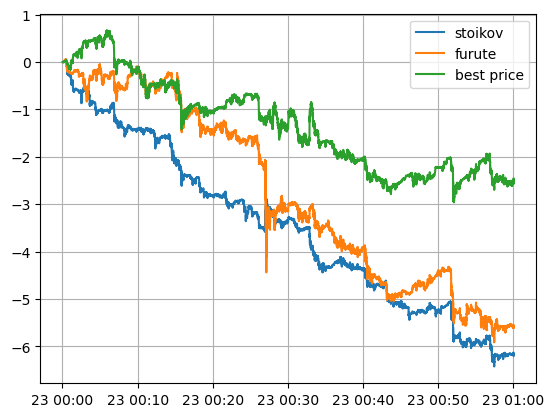

In [15]:
for k, df in dfs.items():
    dt = pd.to_datetime(df.receive_ts)
    plt.plot(dt, df.total, label=k)
plt.legend()
plt.grid()
plt.show()

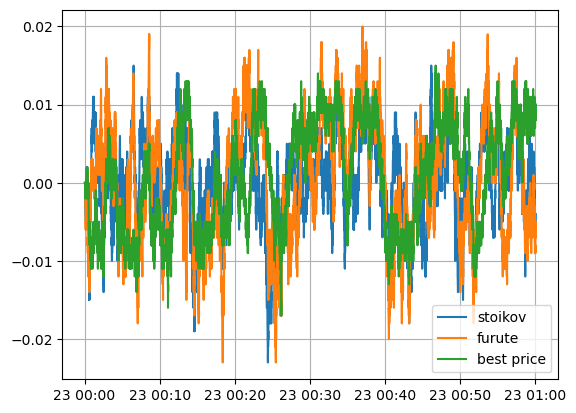

In [16]:
for k, df in dfs.items():
    dt = pd.to_datetime(df.receive_ts)
    plt.plot(dt, df.BTC, label=k)
plt.legend()
plt.grid()
plt.show()

In [17]:
for k, df in dfs.items():
    vol = get_vol(df) / (T / 1e9 / 60)
    
    print(k, 'vol = ', vol)

stoikov vol =  0.14250000000000004
furute vol =  0.13568333333333335
best price vol =  0.19590000000000002
